In [1]:
%matplotlib inline
import serial
from pymongo import MongoClient
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import time

devID = '/dev/cu.usbmodem1421'

In [2]:
#Open serial device to read from
ser = serial.Serial(devID, 9600,timeout=1)

In [3]:
def initMongo(URI='ds021326.mlab.com',port=21326,dbName='kafline',u='admin',p='hackDartmouth16'):
    connection = MongoClient(URI,port)
    db = connection[dbName]
    success = db.authenticate(u,p)
    if success:
        return db
    else:
        raise IOError('Mongo auth failure')

In [4]:
db = initMongo()
sd = db.sensorData

In [5]:
def getWindowReading(ser,window = 2):
    startTime= time.time()
    dists = []
    while time.time() - startTime < window:
        dists.append(float(ser.readline().strip().split(' ')[-1]))
    return np.mean(dists)    

# Log sensor data averaging over a window
Writes data to mongodb

In [ ]:
windows = []
count = 0
while True:
    avg = getWindowReading(ser,window=.5)
    print avg
    windows.append(avg)
    count += 1
    if count % 1 == 0:
        print 'Writing data to Mongo...'
        sd.insert_many([{'Distance': elem,"Date": datetime.datetime.now()} for elem in windows])
        windows = []    

1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
1.0
Writing data to Mongo...
3.0
Writing data to Mongo...
4.0
Writing data to Mongo...
4.0
Writing data to Mongo...


# Plot number of people in line

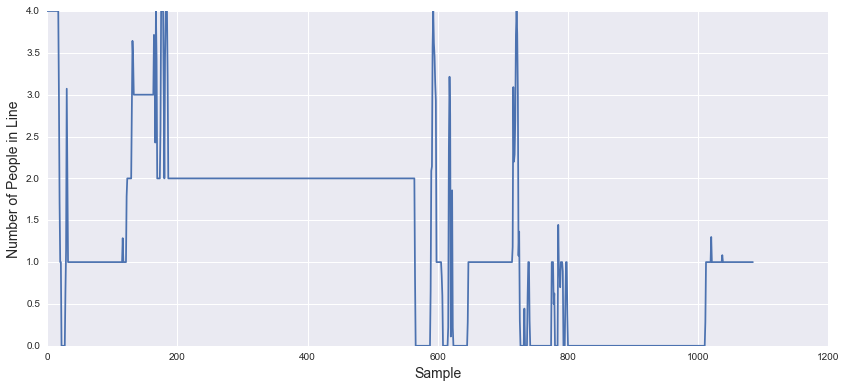

In [12]:
distances =  [elem['Distance'] for elem in sd.find()]
xs = np.arange(len(distances))
fig, ax = plt.subplots(1,1,figsize=(14,6));
ax.plot(xs,distances);
ax.set_xlabel('Sample',fontsize=14);
ax.set_ylabel('Number of People in Line',fontsize=14);


# Compute service speed by taking diffs

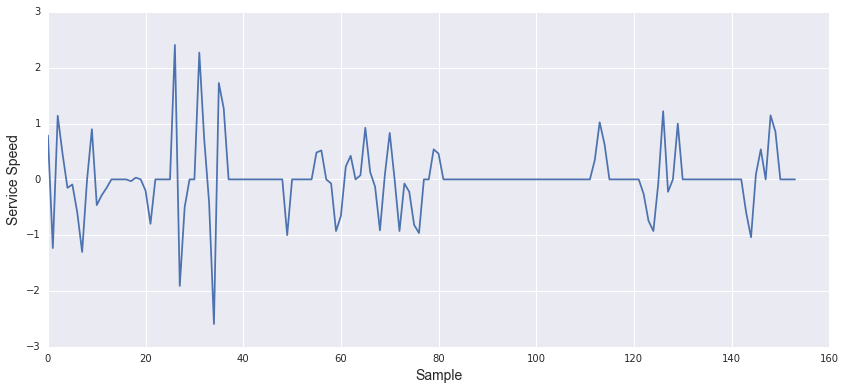

In [62]:
diffs = np.diff(distances)
xsdiffs = np.arange(len(diffs))
fig, ax = plt.subplots(1,1,figsize=(14,6));
ax.plot(xsdiffs,diffs)
ax.set_xlabel('Sample',fontsize=14);
ax.set_ylabel('Service Speed',fontsize=14);

In [13]:
sd.drop()